# Building Cost Estimation Using Monte Carlo Method
###                      Building Cost Risk Analysis
Author: Syed Haseeb Shah <br/>
Email: 18pwciv4991@uetpeshawar.edu.pk

In [147]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


Changing this value will change the resolution (dots per inch of plots generated)

In [148]:
mpl.rcParams['figure.dpi']= 90

This chanages the unit of cost (i.e from Rs to Thousand Rupees)

In [149]:
divisor = 1000

In [150]:
def sanitize(data):
    '''
    Makes sure the data list is a float.
    '''
    refined = []
    for i in data:
        if type(i) == float:
            refined.append(i)
    return np.array(refined)

def process(data):
    '''
    Simulate the construction
    '''
    V = []
    for min_cost, max_cost in data:
        #print(min_cost, max_cost)
        value = np.random.randint(min_cost, max_cost)
        V.append(value)
    return sum(V)


In [151]:
wb = xlrd.open_workbook('cost.xlsx')
sheet1 = wb.sheet_by_index(0)

items = sheet1.col_values(0)
min_cost = sheet1.col_values(1)
max_cost = sheet1.col_values(2)

min_costs =  sanitize(
    min_cost
    )/divisor
max_costs = sanitize(
    max_cost
    )/divisor
raw_data = np.array([items, min_cost, max_cost])

# Transpose prints data correctly
d = pd.DataFrame(raw_data.T)

# Prints in a proper table format
# Uncomment the line below to print the excel data
# display(d)

It is the number of simulations executed per event. The bigger the better.<br/>
Keep it at the very least 1000

In [153]:
simulations = 10000;

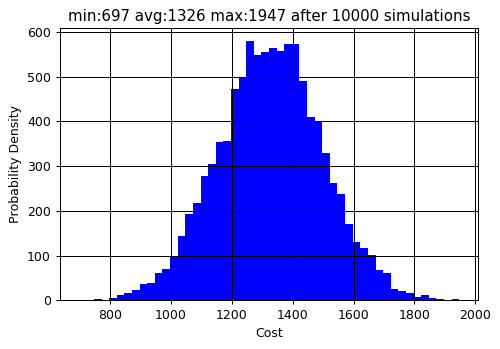

In [154]:
data = list(zip(min_costs, max_costs));
event = [];

for i in range(simulations):
    event.append(process(data));
    
plt.title(
    'min:{} avg:{} max:{} after {} simulations'.format(min(event),
                                                       int(sum(event)/len(event)),
                                                       max(event), simulations)
          );
plt.xlabel('Cost');
plt.ylabel('Probability Density');
plt.grid(color='black');
plt.hist(event, bins=50, color='blue');